In [270]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

from implementations import *
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the data
x_train, x_test, y_train, train_ids, test_ids, headers = load_csv_data('dataset')
x_train.shape, x_test.shape, y_train.shape

((328135, 321), (109379, 321), (328135,))

In [130]:
headers = [
    "Id", "_STATE", "FMONTH", "IDATE", "IMONTH", "IDAY", "IYEAR", "DISPCODE", "SEQNO", "_PSU", "CTELENUM", "PVTRESD1", "COLGHOUS", 
    "STATERES", "CELLFON3", "LADULT", "NUMADULT", "NUMMEN", "NUMWOMEN", "CTELNUM1", "CELLFON2", "CADULT", "PVTRESD2", "CCLGHOUS", 
    "CSTATE", "LANDLINE", "HHADULT", "GENHLTH", "PHYSHLTH", "MENTHLTH", "POORHLTH", "HLTHPLN1", "PERSDOC2", "MEDCOST", "CHECKUP1", 
    "BPHIGH4", "BPMEDS", "BLOODCHO", "CHOLCHK", "TOLDHI2", "CVDSTRK3", "ASTHMA3", "ASTHNOW", "CHCSCNCR", "CHCOCNCR", "CHCCOPD1", 
    "HAVARTH3", "ADDEPEV2", "CHCKIDNY", "DIABETE3", "DIABAGE2", "SEX", "MARITAL", "EDUCA", "RENTHOM1", "NUMHHOL2", "NUMPHON2", 
    "CPDEMO1", "VETERAN3", "EMPLOY1", "CHILDREN", "INCOME2", "INTERNET", "WEIGHT2", "HEIGHT3", "PREGNANT", "QLACTLM2", "USEEQUIP", 
    "BLIND", "DECIDE", "DIFFWALK", "DIFFDRES", "DIFFALON", "SMOKE100", "SMOKDAY2", "STOPSMK2", "LASTSMK2", "USENOW3", "ALCDAY5", 
    "AVEDRNK2", "DRNK3GE5", "MAXDRNKS", "FRUITJU1", "FRUIT1", "FVBEANS", "FVGREEN", "FVORANG", "VEGETAB1", "EXERANY2", "EXRACT11", 
    "EXEROFT1", "EXERHMM1", "EXRACT21", "EXEROFT2", "EXERHMM2", "STRENGTH", "LMTJOIN3", "ARTHDIS2", "ARTHSOCL", "JOINPAIN", 
    "SEATBELT", "FLUSHOT6", "FLSHTMY2", "IMFVPLAC", "PNEUVAC3", "HIVTST6", "HIVTSTD3", "WHRTST10", "PDIABTST", "PREDIAB1", 
    "INSULIN", "BLDSUGAR", "FEETCHK2", "DOCTDIAB", "CHKHEMO3", "FEETCHK", "EYEEXAM", "DIABEYE", "DIABEDU", "CAREGIV1", "CRGVREL1", 
    "CRGVLNG1", "CRGVHRS1", "CRGVPRB1", "CRGVPERS", "CRGVHOUS", "CRGVMST2", "CRGVEXPT", "VIDFCLT2", "VIREDIF3", "VIPRFVS2", 
    "VINOCRE2", "VIEYEXM2", "VIINSUR2", "VICTRCT4", "VIGLUMA2", "VIMACDG2", "CIMEMLOS", "CDHOUSE", "CDASSIST", "CDHELP", 
    "CDSOCIAL", "CDDISCUS", "WTCHSALT", "LONGWTCH", "DRADVISE", "ASTHMAGE", "ASATTACK", "ASERVIST", "ASDRVIST", "ASRCHKUP", 
    "ASACTLIM", "ASYMPTOM", "ASNOSLEP", "ASTHMED3", "ASINHALR", "HAREHAB1", "STREHAB1", "CVDASPRN", "ASPUNSAF", "RLIVPAIN", 
    "RDUCHART", "RDUCSTRK", "ARTTODAY", "ARTHWGT", "ARTHEXER", "ARTHEDU", "TETANUS", "HPVADVC2", "HPVADSHT", "SHINGLE2", 
    "HADMAM", "HOWLONG", "HADPAP2", "LASTPAP2", "HPVTEST", "HPLSTTST", "HADHYST2", "PROFEXAM", "LENGEXAM", "BLDSTOOL", 
    "LSTBLDS3", "HADSIGM3", "HADSGCO1", "LASTSIG3", "PCPSAAD2", "PCPSADI1", "PCPSARE1", "PSATEST1", "PSATIME", "PCPSARS1", 
    "PCPSADE1", "PCDMDECN", "SCNTMNY1", "SCNTMEL1", "SCNTPAID", "SCNTWRK1", "SCNTLPAD", "SCNTLWK1", "SXORIENT", "TRNSGNDR", 
    "RCSGENDR", "RCSRLTN2", "CASTHDX2", "CASTHNO2", "EMTSUPRT", "LSATISFY", "ADPLEASR", "ADDOWN", "ADSLEEP", "ADENERGY", 
    "ADEAT1", "ADFAIL", "ADTHINK", "ADMOVE", "MISTMNT", "ADANXEV", "QSTVER", "QSTLANG", "MSCODE", "_STSTR", "_STRWT", 
    "_RAWRAKE", "_WT2RAKE", "_CHISPNC", "_CRACE1", "_CPRACE", "_CLLCPWT", "_DUALUSE", "_DUALCOR", "_LLCPWT", "_RFHLTH", 
    "_HCVU651", "_RFHYPE5", "_CHOLCHK", "_RFCHOL", "_LTASTH1", "_CASTHM1", "_ASTHMS1", "_DRDXAR1", "_PRACE1", "_MRACE1", 
    "_HISPANC", "_RACE", "_RACEG21", "_RACEGR3", "_RACE_G1", "_AGEG5YR", "_AGE65YR", "_AGE80", "_AGE_G", "HTIN4", "HTM4", 
    "WTKG3", "_BMI5", "_BMI5CAT", "_RFBMI5", "_CHLDCNT", "_EDUCAG", "_INCOMG", "_SMOKER3", "_RFSMOK3", "DRNKANY5", "DROCDY3_", 
    "_RFBING5", "_DRNKWEK", "_RFDRHV5", "FTJUDA1_", "FRUTDA1_", "BEANDAY_", "GRENDAY_", "ORNGDAY_", "VEGEDA1_", "_MISFRTN", 
    "_MISVEGN", "_FRTRESP", "_VEGRESP", "_FRUTSUM", "_VEGESUM", "_FRTLT1", "_VEGLT1", "_FRT16", "_VEG23", "_FRUITEX", "_VEGETEX", 
    "_TOTINDA", "METVL11_", "METVL21_", "MAXVO2_", "FC60_", "ACTIN11_", "ACTIN21_", "PADUR1_", "PADUR2_", "PAFREQ1_", "PAFREQ2_", 
    "_MINAC11", "_MINAC21", "STRFREQ_", "PAMISS1_", "PAMIN11_", "PAMIN21_", "PA1MIN_", "PAVIG11_", "PAVIG21_", "PA1VIGM_", 
    "_PACAT1", "_PAINDX1", "_PA150R2", "_PA300R2", "_PA30021", "_PASTRNG", "_PAREC1", "_PASTAE1", "_LMTACT1", "_LMTWRK1", 
    "_LMTSCL1", "_RFSEAT2", "_RFSEAT3", "_FLSHOT6", "_PNEUMO2", "_AIDTST3"
]
len(headers[27:])   # And 296 if we add the second column

295

Text(0.5, 1.0, 'Proportion of missing values in the dataset')

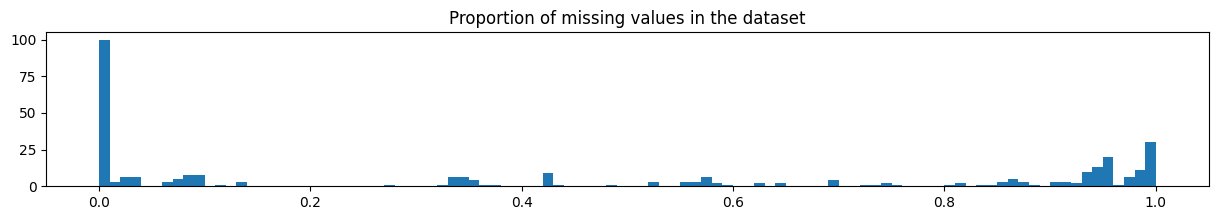

In [244]:
# What is the proportion of missing values in the dataset?
# Count the number of missing values in each column
plt.figure(figsize=(15, 2))
nans = np.isnan(x_train)
nans = np.sum(nans, axis=0)
nans = nans / x_train.shape[0]
plt.hist(nans, bins=100)
plt.title("Proportion of missing values in the dataset")

# Cleaning

First, we discard columns related to the interview's condition (date, partiality, ...). We discard the 27 first columns except the second one.

In [341]:
x_tr, x_ts = x_train[:, 26:], x_test[:, 26:]
# Add the second column of x_train to x_tr and x_ts
x_tr = np.column_stack((x_tr, x_train[:, 1]))
x_ts = np.column_stack((x_ts, x_test[:, 1]))
x_tr.shape, x_ts.shape

((328135, 296), (109379, 296))

Next, for every response that was "don't know" (7 or 77) or "Refused" (9 or 99), we will replace these values with zeros after normalization. For now, we turn them to nans so that they don't play a role in the normalization.

In [342]:
# Replace every value of 7, 9, 77, or 99 in x_tr and x_ts with a nan
def replace_values(x_tr, x_ts, bool=True):
    x_tr_copy = x_tr.copy()
    x_ts_copy = x_ts.copy()
    if True:
        x_tr_copy[np.isin(x_tr_copy, [7, 9, 77, 99])] = np.nan
        x_ts_copy[np.isin(x_ts_copy, [7, 9, 77, 99])] = np.nan
    else:
        x_tr_copy[np.isin(x_tr_copy, [7, 77])] = np.nan
        x_ts_copy[np.isin(x_ts_copy, [7, 77])] = np.nan
    return x_tr_copy, x_ts_copy

# Normalize the data
def normalize(x):
    mean = np.nanmean(x, axis=0)
    std = np.nanstd(x, axis=0)
    return (x - mean) / std

Now, let's remove the features that are highly correlated with one another:

94 Columns to drop: [8, 22, 26, 28, 30, 34, 78, 81, 83, 89, 90, 94, 95, 97, 98, 101, 102, 103, 105, 106, 107, 108, 111, 112, 114, 116, 124, 125, 127, 131, 136, 137, 138, 144, 146, 153, 156, 158, 159, 160, 166, 168, 174, 175, 178, 180, 181, 184, 185, 186, 187, 188, 194, 198, 205, 213, 216, 217, 220, 222, 224, 226, 227, 235, 236, 237, 238, 241, 246, 247, 248, 249, 252, 253, 258, 259, 260, 261, 269, 270, 272, 273, 275, 276, 279, 280, 281, 282, 283, 284, 285, 287, 290, 292]
x_tr shape: (328135, 296), x_ts shape: (109379, 296)
115 Columns to drop: [8, 10, 14, 15, 19, 22, 26, 30, 34, 36, 46, 47, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 83, 84, 85, 86, 87, 88, 93, 94, 96, 103, 107, 108, 111, 112, 114, 116, 120, 121, 123, 124, 125, 126, 127, 137, 148, 153, 155, 156, 158, 160, 166, 168, 174, 180, 181, 182, 183, 184, 185, 186, 187, 188, 194, 197, 198, 209, 210, 213, 215, 216, 217, 218, 226, 228, 246, 247, 248, 249, 258, 259, 260, 261

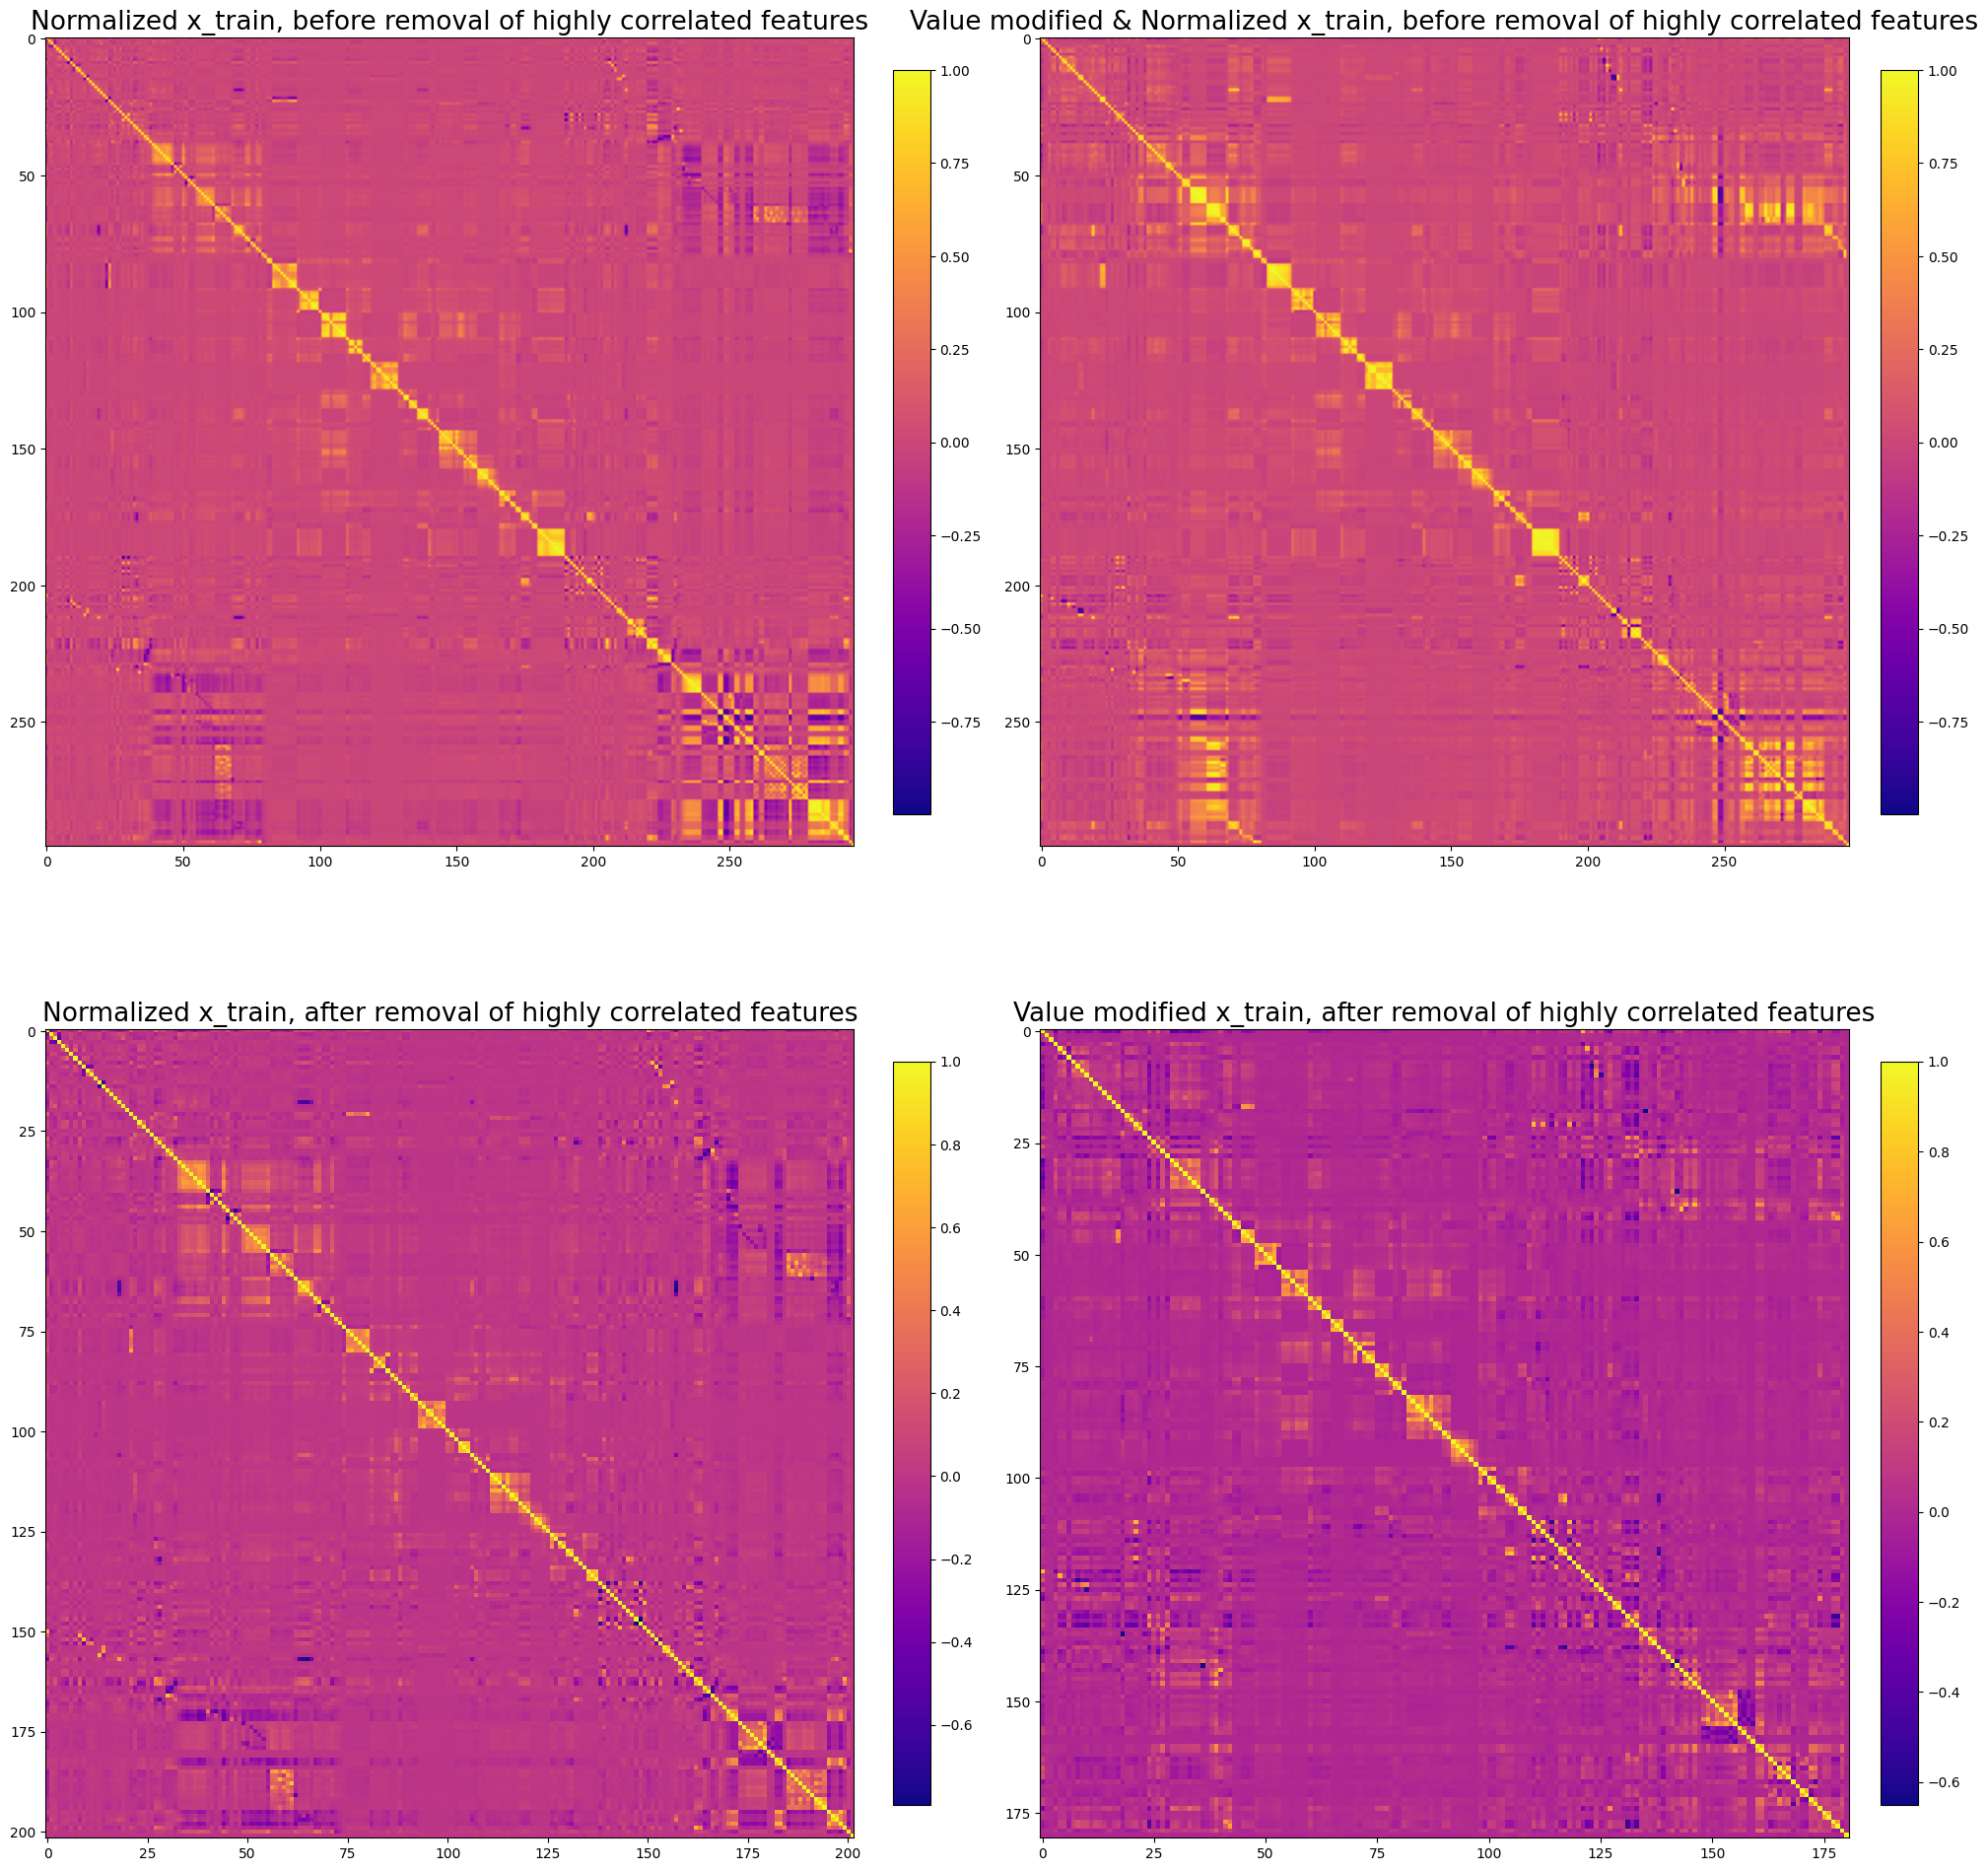

In [231]:
# Plot a correlation matrix of x_tr
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20), layout="constrained")

### First correlation matrix (before removal of highly correlated features
# Normalize
x_tr_plot_1 = normalize(x_tr)
x_ts_plot_1 = normalize(x_ts)

# Replace nan values with the median of the corresponding column
x_tr_plot_1 = np.nan_to_num(x_tr, nan=np.nanmedian(x_tr_plot_1, axis=0))
x_ts_plot_1 = np.nan_to_num(x_ts, nan=np.nanmedian(x_ts_plot_1, axis=0))

corr1 = np.corrcoef(x_tr_plot_1, rowvar=False)
im1 = axs[0, 0].imshow(corr1, cmap="plasma")
fig.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)
axs[0, 0].set_title("Normalized x_train, before removal of highly correlated features", fontsize=19)


### Second correlation matrix (replacement of don't know values and prefer not to answer values)

# Replace the values 7, 9, 77, and 99 with nan
x_tr_plot_2, x_ts_plot_2 = replace_values(x_tr, x_ts)

# Normalize
x_tr_plot_2 = normalize(x_tr_plot_2)
x_ts_plot_2 = normalize(x_ts_plot_2)

# Replace nan values with the median of the corresponding column
x_tr_plot_2 = np.nan_to_num(x_tr_plot_2, nan=np.nanmedian(x_tr, axis=0))
x_ts_plot_2 = np.nan_to_num(x_ts_plot_2, nan=np.nanmedian(x_ts, axis=0))

corr2 = np.corrcoef(x_tr_plot_2, rowvar=False)
im2 = axs[0, 1].imshow(corr2, cmap="plasma")
fig.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)
axs[0, 1].set_title("Value modified & Normalized x_train, before removal of highly correlated features", fontsize=19)


## Identify features to drop based on high correlation

### Third correlation matrix (after removal of correlated features) for x_tr_plot_1

mask = np.triu(np.ones_like(corr1, dtype=bool), k=1)
to_drop = [i for i in range(corr1.shape[1]) if any(abs(corr1[i, mask[i]]) > 0.8)]
print(f"{len(to_drop)} Columns to drop: {to_drop}")

# Drop the columns from x_tr and x_ts
x_tr_plot_3 = np.delete(x_tr_plot_1, to_drop, axis=1)
x_ts_plot_3 = np.delete(x_tr_plot_1, to_drop, axis=1)
print(f"x_tr shape: {x_tr.shape}, x_ts shape: {x_ts.shape}")

corr1_after = np.corrcoef(x_tr_plot_3, rowvar=False)
im3 = axs[1, 0].imshow(corr1_after, cmap="plasma")
fig.colorbar(im3, ax=axs[1, 0], fraction=0.046, pad=0.04)
axs[1, 0].set_title("Normalized x_train, after removal of highly correlated features", fontsize=19)

### Fourth correlation matrix, (after removal of correlated features) for x_tr_plot_2

mask = np.triu(np.ones_like(corr2, dtype=bool), k=1)
to_drop = [i for i in range(corr2.shape[1]) if any(abs(corr2[i, mask[i]]) > 0.8)]
print(f"{len(to_drop)} Columns to drop: {to_drop}")

# Drop the columns from x_tr and x_ts
x_tr_plot_4 = np.delete(x_tr_plot_2, to_drop, axis=1)
x_ts_plot_4 = np.delete(x_tr_plot_2, to_drop, axis=1)
print(f"x_tr shape: {x_tr.shape}, x_ts shape: {x_ts.shape}")

corr2_after = np.corrcoef(x_tr_plot_4, rowvar=False)
im4 = axs[1, 1].imshow(corr2_after, cmap="plasma")
fig.colorbar(im4, ax=axs[1, 1], fraction=0.046, pad=0.04)
axs[1, 1].set_title("Value modified x_train, after removal of highly correlated features", fontsize=19)

plt.show()


# Model

First, we define some useful functions:

In [209]:
def split_data(x, y, ratio, seed=1):
    np.random.seed(seed)
    n = len(y)
    indices = np.random.permutation(n)
    n_train = int(np.floor(n * ratio))
    indices_train = indices[:n_train]
    indices_test = indices[n_train:]
    return x[indices_train], x[indices_test], y[indices_train], y[indices_test]

def compute_accuracy(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def compute_f1_score(y, y_pred):
    # True positives: predicted 1 and actual 1
    tp = np.sum((y == 1) & (y_pred == 1))
    # False positives: predicted 1 but actual -1
    fp = np.sum((y == -1) & (y_pred == 1))
    # False negatives: predicted -1 but actual 1
    fn = np.sum((y == 1) & (y_pred == -1))
    
    # Precision and recall, with safety check for division by zero
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    return 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

## Baselines

In [344]:
# Replace the values 7, and 77 with nan
x_tr, x_ts = replace_values(x_tr, x_ts, False)

# Normalize
x_tr = normalize(x_tr)
x_ts = normalize(x_ts)

# Replace nan values with 0
x_tr = np.nan_to_num(x_tr, 0)
x_ts = np.nan_to_num(x_ts, 0)

# Remove the highly correlated columns
corr = np.corrcoef(x_tr, rowvar=False)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
to_drop = [i for i in range(corr.shape[1]) if any(abs(corr[i, mask[i]]) > 0.8)]
x_tr = np.delete(x_tr, to_drop, axis=1)
x_ts = np.delete(x_tr, to_drop, axis=1)
headers = np.delete(headers, to_drop, axis=0)

In [345]:
x_tr.shape, x_ts.shape

((328135, 244), (328135, 244))

### Implementations.py

In [264]:
# Use the implementations.py file to test reg_logistic_regression, logistic_regression, ridge_regression and least_squares

# Add the bias term to the data and initialize parameters
x_tr_augm = np.column_stack((np.ones(x_tr.shape[0]), x_tr))
lambda_ = 0.1
initial_w = np.zeros(x_tr_augm.shape[1])
max_iters = 1000
gamma = 0.01

# Split the data 
X_tr, X_val, Y_tr, Y_val = split_data(x_tr_augm, y_train, 0.8)

# Test least squares
w_ls, loss_ls = least_squares(Y_tr, X_tr)

# Test ridge regression
w_r, loss_r = ridge_regression(Y_tr, X_tr, lambda_)

# Test logistic regression
w_lr, loss_lr = logistic_regression(Y_tr, X_tr, initial_w, max_iters, gamma)

# Test regularized logistic regression
w_rlr, loss_rlr = reg_logistic_regression(Y_tr, X_tr, lambda_, initial_w, max_iters, gamma)


In [267]:
# Test on the validation set
def predict_labels(w, tx):
    return 2 * (tx @ w > 0) - 1

# Calculate the accuracy and F1 score on the test set
pred_ls = predict_labels(w_ls, X_val)
pred_r = predict_labels(w_r, X_val)
pred_lr = predict_labels(w_lr, X_val)
pred_rlr = predict_labels(w_rlr, X_val)

acc_ls = np.mean(pred_ls == Y_val)
acc_r = np.mean(pred_r == Y_val)
acc_lr = np.mean(pred_lr == Y_val)
acc_rlr = np.mean(pred_rlr == Y_val)

f1_ls = compute_f1_score(Y_val, pred_ls)
f1_r = compute_f1_score(Y_val, pred_r)
f1_lr = compute_f1_score(Y_val, pred_lr)
f1_rlr = compute_f1_score(Y_val, pred_rlr)

print(f"Accuracy least squares: {acc_ls}", f"F1 score on the test set: {f1_ls}")
print(f"Accuracy ridge: {acc_r}", f"F1 score on the test set: {f1_r}")
print(f"Accuracy logistic regrression: {acc_lr}", f"F1 score on the test set: {f1_lr}")
print(f"Accuracy regularized logistic regression: {acc_rlr}", f"F1 score on the test set: {f1_rlr}")

Accuracy least squares: 0.9158425647980252 F1 score on the test set: 0.09444171175602559
Accuracy ridge: 0.9160558916299694 F1 score on the test set: 0.12458286985539486
Accuracy logistic regrression: 0.9028753409419903 F1 score on the test set: 0.3455852156057495
Accuracy regularized logistic regression: 0.9061971444679782 F1 score on the test set: 0.3257393209200438


Test lasso logistic regression

In [271]:
# Test lasso logistic regression
w_lasso, loss_lasso = lasso_logistic_regression(Y_tr, X_tr, lambda_, initial_w, max_iters, gamma)

# Predict labels, and calculate accuracy and F1-score on test set
pred_lasso = predict_labels(w_lasso, X_val)
acc_lasso = np.mean(pred_lasso == Y_val)
f1_lasso = compute_f1_score(Y_val, pred_lasso)
print(f"Accuracy lasso: {acc_ls}", f"F1 score on the test set: {f1_ls}")

Accuracy lasso: 0.9158425647980252 F1 score on the test set: 0.09444171175602559


### Decision Tree

We could think that with the calculated variables, there is no need for extra composition of variables, and thus that a decision tree could be a good model.

In [292]:
### Extract the 20 features most correlated to the target variable

# Assuming y is your target variable
correlations = np.corrcoef(x_tr, y_train, rowvar=False)

# Get the absolute correlation values with the target variable
target_correlations = abs(correlations[-1, :-1])

# Get indices of the 20 most correlated features
top_indices = np.argsort(target_correlations)[-20:]

print(f"The top features are indices {top_indices}")

The top features are indices [131  31  21  22  14  32  23  38 120 163  26 124  12  27   9 125  30 118
 116   0]


In [311]:
# Select the features, and only 1000 samples for visualization
x_viz = x_tr[:1000, top_indices]
y_viz = y_train[:1000]

# Add the target variable to the data
y_viz = y_viz.reshape(-1, 1)
x_viz = np.hstack([x_viz, y_viz, ])

# Create a new header
new_header = [headers[i] for i in top_indices] + ['y']

# Add the header to the data
x_viz = np.vstack([new_header, x_viz])
x_viz.shape
# Export the data to a csv file
np.savetxt('dataset/data_viz_final.csv', x_viz, delimiter=',', fmt='%s')

## Elaborate models

Because of the sparsity of the data, we decide to use gradient descent instead of stochastic gradient descent, in order to be sure than every weight is taken into account in the updates.

For our elaborate model, we decided to allow the model to learn relationships in higher dimensions. For computational purposes, we limited our model to cubed dimensions.

In [313]:
# Compute squared and cubed features and normalize them
x_train_sq = normalize(x_tr**2)
x_train_cub = normalize(x_tr**3)

# Add the squared and cubed features to the data
x_train_augm = np.column_stack((x_tr, x_train_sq, x_train_cub))

# Add the bias term to the data
x_train_augm = np.column_stack((np.ones(x_train_augm.shape[0]), x_tr))

# Do regularized linear regression
lambda_ = 0.1
initial_w = np.zeros(x_train_augm.shape[1])
max_iters = 2000
gamma = 0.01

# Split the data 
X_tr, X_val, Y_tr, Y_val = split_data(x_train_augm, y_train, 0.8)

# Compute the optimal weights and loss
w, losses_train, losses_val = training(Y_tr, X_tr, lambda_, initial_w, max_iters, gamma, X_val, Y_val)

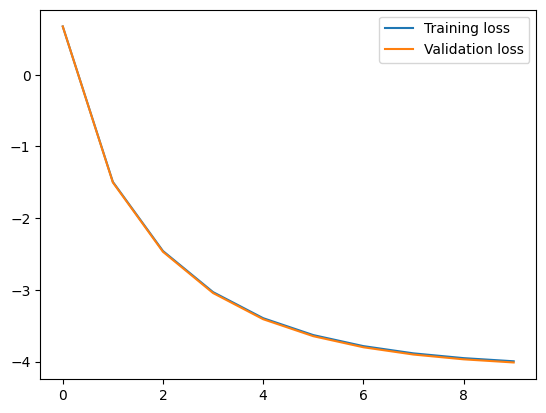

In [314]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.legend(['Training loss', 'Validation loss'])

We tuned the prediction boundary between the MICHD or non MICHD by looking at the value maximizing the F1-score.

In [315]:
def predict_labels(w, tx):
    return 2 * (tx @ w > -1.9) - 1  # -1.9 is the prediction boundary

# Calculate the accuracy for the training and test sets
pred_tr = predict_labels(w, X_tr)
pred_val = predict_labels(w, X_val)

acc_tr = np.mean(pred_tr == Y_tr)
acc_ts = np.mean(pred_val == Y_val)

f1_tr = compute_f1_score(Y_tr, pred_tr)
f1_ts = compute_f1_score(Y_val, pred_val)

print(f"Accuracy on the training set: {acc_tr}", f"F1 score on the training set: {f1_tr}")
print(f"Accuracy on the test set: {acc_ts}", f"F1 score on the test set: {f1_ts}")

Accuracy on the training set: 0.8555929724046505 F1 score on the training set: 0.4024401778114064
Accuracy on the test set: 0.8561567647462173 F1 score on the test set: 0.3978823829570098


# Submission

For the submission, we train our elaborate model on the whole dataset.

In [ ]:
# Compute squared and cubed features and normalize them
x_tr_sq = normalize(x_tr**2)
x_ts_sq = normalize(x_ts**2)
x_tr_cub = normalize(x_tr**3)
x_ts_cub = normalize(x_ts**3)

# Add the squared and cubed features to the data
x_tr_augm = np.column_stack((x_tr, x_tr_sq, x_tr_cub))
x_ts_augm = np.column_stack((x_ts, x_ts_sq, x_ts_cub))

# Add the bias term to the data
x_tr_augm = np.column_stack((np.ones(x_tr_augm.shape[0]), x_tr_augm)) 
x_ts_augm = np.column_stack((np.ones(x_ts_augm.shape[0]), x_ts_augm))

lambda_ = 0.1
initial_w = np.zeros(x_tr_augm.shape[1])
max_iters = 5000
gamma = 0.01

w, loss = reg_logistic_regression(y_train, x_tr_augm, lambda_, initial_w, max_iters, gamma)

In [334]:
# Predict on x_ts
x_ts_augm = np.column_stack((x_ts, x_ts**2, x_ts**3))
x_ts_augm = np.column_stack((np.ones(x_ts_augm.shape[0]), x_ts_augm)) # bias term
pred = predict_labels(w, x_ts_augm)
create_csv_submission(test_ids, pred, 'submission.csv')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 511 is different from 478)

In [332]:
pred_xxx = predict_labels(w, x_augm)
f1_tr = compute_f1_score(Y_tr, pred_tr)

-4.088853483768001